Raúl Correa Ocañas

A01722401

02-03-2024

# Actividad: DTs, Resampling, y Encoding

1. Carga el dataset de vinos

In [101]:
import pandas as pd

In [102]:
wine = pd.read_csv(r'C:\Users\Raul\OneDrive\Escritorio\CS\TC2004B.101\data\winequalityN.csv')
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2. En lugar de utilizar la variable objetivo como "type", usa "quality".
Usa el siguiente código para remover las categorías con muy pocos integrantes (necesario para usar ADASYN):
* `wine = wine[wine["quality"]!=9]`
* `wine = wine[wine["quality"]!=3]`
* `wine.reset_index()`

In [103]:
wine = wine[wine["quality"]!=9]
wine = wine[wine["quality"]!=3]
wine.reset_index()

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6458,6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6459,6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6460,6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Conversión a variables numericas con encoding. Por facilidadad, usaremos `pd.get_dummies()`.

In [104]:
wine = pd.get_dummies(wine, drop_first=True)
len(wine[wine.isna().any(axis=1)]) / len(wine)
# El porcentaje es muy bajo, por lo que podemos hacer imputacion

0.005261528938409161

In [105]:
for column in wine:
    if (column == 'quality' or column == 'type_white'):
        pass
    else:
        column_mean = wine[column].mean()
        wine[column].fillna(column_mean, inplace=True)

print(len(wine[wine.isna().any(axis=1)]) / len(wine))
wine

0.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531381,11.2,6,False
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,False


3. ¿Están balanceados tus datos? Si no, utiliza alguna técnica de resampling para balancearlos.

True

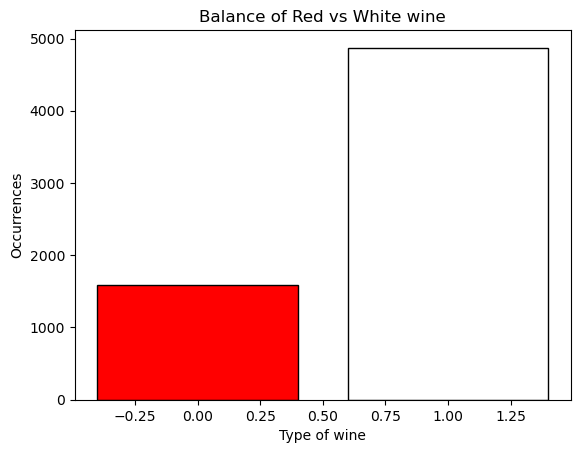

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt 

y = wine["type_white"]
plt.bar(y.value_counts().index, y.value_counts()[:],
        color = ["white","red"],
        edgecolor = ["black",[0,0,0]]
       )
plt.xlabel("Type of wine")
plt.ylabel("Occurrences")
plt.title("Balance of Red vs White wine")
y.value_counts().index[0]


Hay un desvalance para `type_white` y `quality`. Por mientras haré un undersample para `type_white`, pero lo ideal si se tuvieran más datos sería hacer un resampling considerando `quality` también.

Primero se hace la separación de los datos, ya que si empezamos con el resampling y después se hace el split, estaremos sesgando el modelo.

4. Divide tus datos en datos de entrenamiento y prueba (Train/Test). Usa el porcentaje que quieras.

In [107]:
X = wine.drop('quality', axis=1)
y = wine['quality']
y.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
Name: count, dtype: int64

In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

scaler.fit(X)

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,-0.165103,-0.422895,0.283634,3.205644,-0.314787,0.838046,0.966500,2.103765,-1.360260,-0.546631,-1.419033,0.571036
1,-0.706525,-0.238758,0.145797,-0.808442,-0.199967,-0.951509,0.289939,-0.231630,0.510426,-0.277955,-0.831886,0.571036
2,0.685702,-0.361516,0.559308,0.305414,-0.171262,-0.027868,-0.333210,0.135361,0.261001,-0.613801,-0.328617,0.571036
3,-0.010411,-0.668410,0.007960,0.641673,0.058379,0.953501,1.251368,0.302175,-0.175492,-0.882477,-0.496374,0.571036
4,-0.010411,-0.668410,0.007960,0.641673,0.058379,0.953501,1.251368,0.302175,-0.175492,-0.882477,-0.496374,0.571036


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
rus.fit(X_train, y_train)

X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
y_train_res.value_counts()

quality
4    163
5    163
6    163
7    163
8    163
Name: count, dtype: int64

5. Elige un hiperparámetro para cambiar, y entrena un Decision Tree o un **SVM**. Puede ser alguno de los vistos en clase o algún otro en la documentación de SciKit Learn.


In [110]:
from sklearn.svm import SVC 
svclassifier = SVC(
    C = 2.0, # Regularization term. Higher = more noise = less overfitting
    kernel = 'poly', # Kernel. 'rbf' is the default, 'linear' and 'poly' are also available
    degree = 2, # Degree of the polynomial. Higher = more complexity
    class_weight = None, # Weights for rebalancing or for changing class importance
    max_iter = 10000, # Set to none to let it run as much as possible.
    random_state = 42, 
)

In [111]:
svclassifier.fit(X_train,y_train)

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=2.0, degree=2, kernel='poly', max_iter=10000, random_state=42)

In [112]:
svclassifier.score(X_test, y_test)

0.5235885537509667

In [113]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [114]:
y_pred = svclassifier.predict(X_test)
svclassifier.classes_ # You can use this to get the labels and the order they were learned in

array([4, 5, 6, 7, 8], dtype=int64)

Text(70.72222222222221, 0.5, 'Labels')

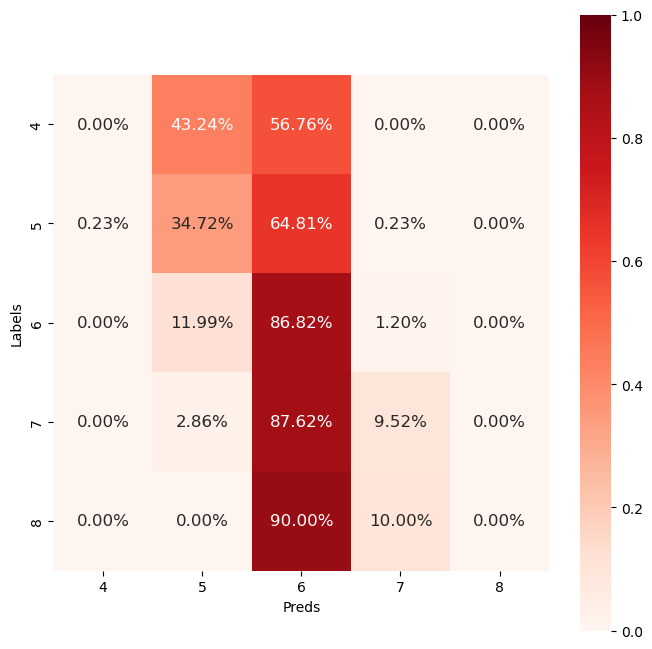

In [115]:
cnfs = confusion_matrix(y_test, y_pred, normalize= 'true')
plt.figure(figsize=(8,8))
sns.heatmap(cnfs,
            annot=True,
            cmap="Reds",
            vmin=0,
            vmax=1,
            square= True,
            fmt='.2%',
            annot_kws={"size": 12}
           )
plt.xlabel("Preds")
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5],labels=svclassifier.classes_)
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5],labels=svclassifier.classes_)
plt.ylabel("Labels")

In [116]:
def get_scores(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    accuracy =  svclassifier.score(X_test, y_test)
    print("The scores for are: ")
    print("------------------")
    print("Accuracy : " , accuracy)
    print("F1 SCORE : ",f1)
    print("RECALL   : ",recall)
    print("PRECISION: ",precision)
    return accuracy,f1, recall, precision

In [117]:
raul = get_scores(y_test, y_pred)

c:\Users\Raul\miniconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The scores for are: 
------------------
Accuracy :  0.5235885537509667
F1 SCORE :  0.24872858078176324
RECALL   :  0.2621222004783649
PRECISION:  0.3525085230788309
